***Why the French life style is more appealing than the UK's one?***

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import geopandas as gpd
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
style.use('fivethirtyeight')



In [2]:
hours_worked = pd.read_csv(r"C:\Users\umber\OneDrive\Documents\GitHub\France_vs_UK\Annual Average Hours Worked per worker.csv",
                           encoding='utf8')
print(hours_worked.info())
print(hours_worked.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COUNTRY                992 non-null    object 
 1   Country                992 non-null    object 
 2   EMPSTAT                992 non-null    object 
 3   Employment status      992 non-null    object 
 4   FREQUENCY              992 non-null    object 
 5   Frequency              992 non-null    object 
 6   TIME                   992 non-null    int64  
 7   Time                   992 non-null    int64  
 8   Unit Code              992 non-null    object 
 9   Unit                   992 non-null    object 
 10  PowerCode Code         992 non-null    int64  
 11  PowerCode              992 non-null    object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  992 non-null    float64
 15  Flag C

In [3]:
#I will now separate UK and France series from the dataframe
hour_france_uk = hours_worked.loc[(hours_worked["Country"] == "France") | (hours_worked["Country"] == "United Kingdom")]
hour_france = hours_worked.loc[(hours_worked["Country"] == "France") & (hours_worked["EMPSTAT"] == "DE")]
hour_uk  = hours_worked.loc[(hours_worked["Country"] == "United Kingdom") & (hours_worked["EMPSTAT"] == "DE")]

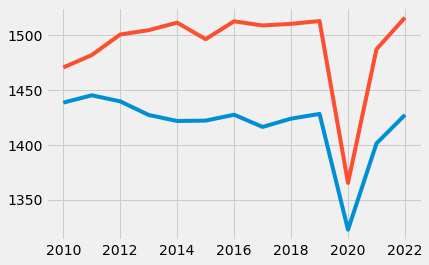

In [4]:
plt.plot(hour_france["Time"], hour_france["Value"])
plt.plot(hour_uk["Time"], hour_uk["Value"])

plt.show()



In [5]:
average_hours_fr = hour_france["Value"].mean()
print(average_hours_fr)
average_hours_uk = hour_uk["Value"].mean()
print(average_hours_uk)
difference_of_hours = round(average_hours_uk - average_hours_fr, 2)
percentage_difference = (difference_of_hours / average_hours_fr) * 100
print("UK workers work on average ", difference_of_hours, " hours more than French workers")
print("Difference in % of the average hours worked: ", percentage_difference, "%")


1418.701999143355
1490.7953915310416
UK workers work on average  72.09  hours more than French workers
Difference in % of the average hours worked:  5.0814054003962505 %


In [6]:
average_hours_fr_2023 = hour_france.loc[hour_france["Time"] == 2022, "Value"].values[0]

average_hours_uk_2023 = hour_uk.loc[hour_uk["Time"] == 2022, "Value"].values[0]
difference_of_hours_2023 = round(average_hours_uk_2023 - average_hours_fr_2023, 2)
percentage_difference_2023 = (difference_of_hours_2023 / average_hours_fr_2023) * 100

print("UK workers work on average ", difference_of_hours_2023, " hours more than French workers in 2022")
print("Difference in % of the average hours worked in 2022: ", percentage_difference_2023, "%")



UK workers work on average  88.69  hours more than French workers in 2022
Difference in % of the average hours worked in 2022:  6.213184820385658 %


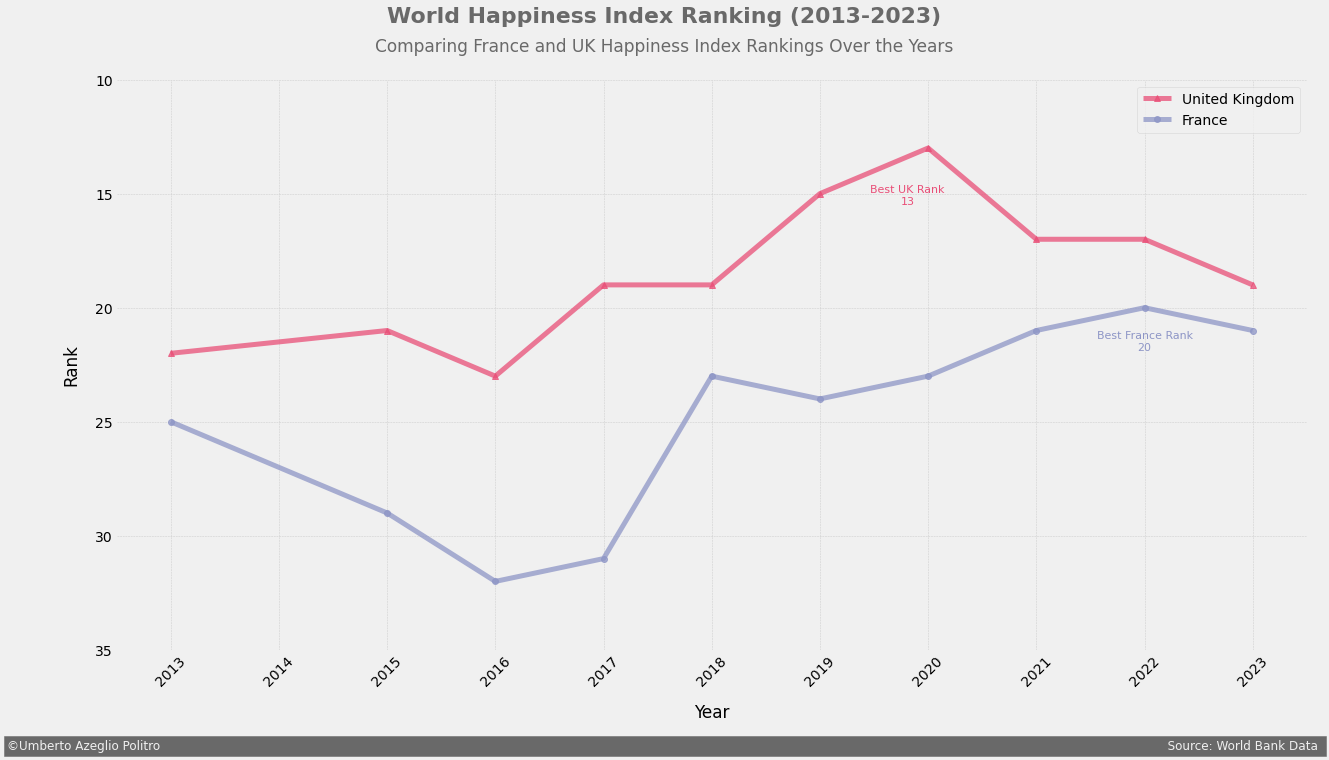

In [147]:
happiness_index = pd.read_excel(r"C:\Users\umber\OneDrive\Documents\GitHub\France_vs_UK\World Happiness Index by Reports 2013-2023.xlsx",engine='openpyxl')
happiness_fr_uk = happiness_index[(happiness_index["Country"] == "France") | (happiness_index["Country"] == "UK")]
happiness_fr = happiness_index[(happiness_index["Country"] == "France")]
happiness_uk = happiness_index[(happiness_index["Country"] == "United Kingdom")]
fig, ax = plt.subplots(figsize = (19, 11))
spines = ["top", "left", "bottom", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)
plt.plot(happiness_uk["Year"], happiness_uk["Rank"], label = "United Kingdom", marker='^',color = "#E94E77",  linewidth=5, alpha = 0.75)
plt.plot(happiness_fr["Year"], happiness_fr["Rank"], label = "France", marker='o',color = "#8D95C6", linewidth=5, alpha = 0.75)
max_fr = min(happiness_fr["Rank"])
max_year_fr = happiness_fr.loc[happiness_fr["Rank"] == max_fr, "Year"].iloc[0]


max_uk = min(happiness_uk["Rank"])
max_year_uk = happiness_uk.loc[happiness_uk["Rank"] == max_uk, "Year"].iloc[0]
#ax.annotate(f'Best UK Rank\n{max_uk}', 
             #(max_year_uk, max_uk), 
             #textcoords="offset points", 
             #xytext=( -5,-50), 
             #ha='center', 
             #fontsize=9,
             #arrowprops=dict(arrowstyle="->", lw=1))
                
ax.text(max_year_fr, max_fr + 1, f'Best France Rank\n{max_fr}', ha='center', va='top', fontsize=11, color="#8D95C6")
ax.text(max_year_uk - 0.19, max_uk + 1.6, f'Best UK Rank\n{max_uk}', ha='center', va='top', fontsize=11, color="#E94E77")

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.invert_yaxis()

ax.set_ylim(35, 10)

plt.xticks(rotation=45)
ax.set_xlabel("Year", labelpad=15)
ax.set_ylabel("Rank", labelpad=15)
ax.set_xticks(range(2013, 2024))
plt.legend()
#fig.set_facecolor('#fafafa')
#ax.set_facecolor('#fafafa')
# Adjust the bottom margin of the figure to create space for the text
plt.subplots_adjust(bottom=0.16)

# Add the text to the bottom left of the figure
fig.text(0, 0.03, '©Umberto Azeglio Politro' + ' '*260 + 'Source: World Bank Data ',
         color='#f0f0f0', backgroundcolor="#696969",
         size=12, ha='left', va='bottom')


#ax.grid(visible = False)
ax.text(0.46, 1.10, "World Happiness Index Ranking (2013-2023)", transform=ax.transAxes, size=22, weight='bold', ha="center", color = "#696969")
ax.text(0.46, 1.05, "Comparing France and UK Happiness Index Rankings Over the Years", transform=ax.transAxes, size=17, ha="center", color = "#696969")
#plt.title("World Happiness Index Rank (2013-2023)", size = 16, weight = "bold",pad=20, loc='center')
#ax.text(0.01, 0.05, "World Happiness Index Rank (2013-2023)", size=17, weight='bold')



plt.savefig("World happiness index Ranking", dpi=100, bbox_inches='tight')



In [8]:
gdp_df = pd.read_csv(r"C:\Users\umber\OneDrive\Documents\GitHub\France_vs_UK\163b9e90-aa74-48e6-91e2-d3a53b7c16a4_Series - Metadata.csv", encoding = "utf8")
print(gdp_df)
year_columns_mapping = {f"{year} [YR{year}]": str(year) for year in range(2000, 2023)}
gdp_df = gdp_df[0:2]
gdp_df = gdp_df.rename(columns = year_columns_mapping)
gdp_df = gdp_df.melt(id_vars = ["Country Name"], value_vars=[str(year) for year in range(2000, 2023)],var_name="Year",
                     value_name="GDP $")
gdp_df.info()
gdp_df["Year"] = pd.to_datetime(gdp_df["Year"])
gdp_df["Year"] = gdp_df["Year"].dt.strftime('%Y').astype(int)
gdp_df["GDP $"] = gdp_df["GDP $"].astype(float)
gdp_df["GDP $"] = round(gdp_df["GDP $"], 2)
gdp_df["After 2012"] = np.where(gdp_df["Year"] > 2012,1,0)
gdp_df

                                        Series Name     Series Code  \
0                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
1                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
2                                               NaN             NaN   
3                                               NaN             NaN   
4                                               NaN             NaN   
5  Data from database: World Development Indicators             NaN   
6                          Last Updated: 09/15/2023             NaN   
7                                              Code    License Type   
8                                    NY.GDP.PCAP.CD       CC BY-4.0   

                   Country Name  \
0                        France   
1                United Kingdom   
2                           NaN   
3                           NaN   
4                           NaN   
5                           NaN   
6                           NaN   
7        

,Country Name,Year,GDP $,After 2012
0,France,2000,22416.43,0
1,United Kingdom,2000,28289.65,0
2,France,2001,22449.34,0
3,United Kingdom,2001,27888.61,0
4,France,2002,24288.27,0
5,United Kingdom,2002,30078.61,0
6,France,2003,29627.92,0
7,United Kingdom,2003,34480.94,0
8,France,2004,33797.16,0
9,United Kingdom,2004,40392.26,0


      Country Name  Year     GDP $  After 2012
27  United Kingdom  2013  43449.09           1
29  United Kingdom  2014  47447.59           1
31  United Kingdom  2015  45071.07           1
33  United Kingdom  2016  41146.08           1
35  United Kingdom  2017  40622.69           1
37  United Kingdom  2018  43306.31           1
39  United Kingdom  2019  42747.08           1
41  United Kingdom  2020  40318.42           1
43  United Kingdom  2021  46585.90           1
45  United Kingdom  2022  45850.43           1


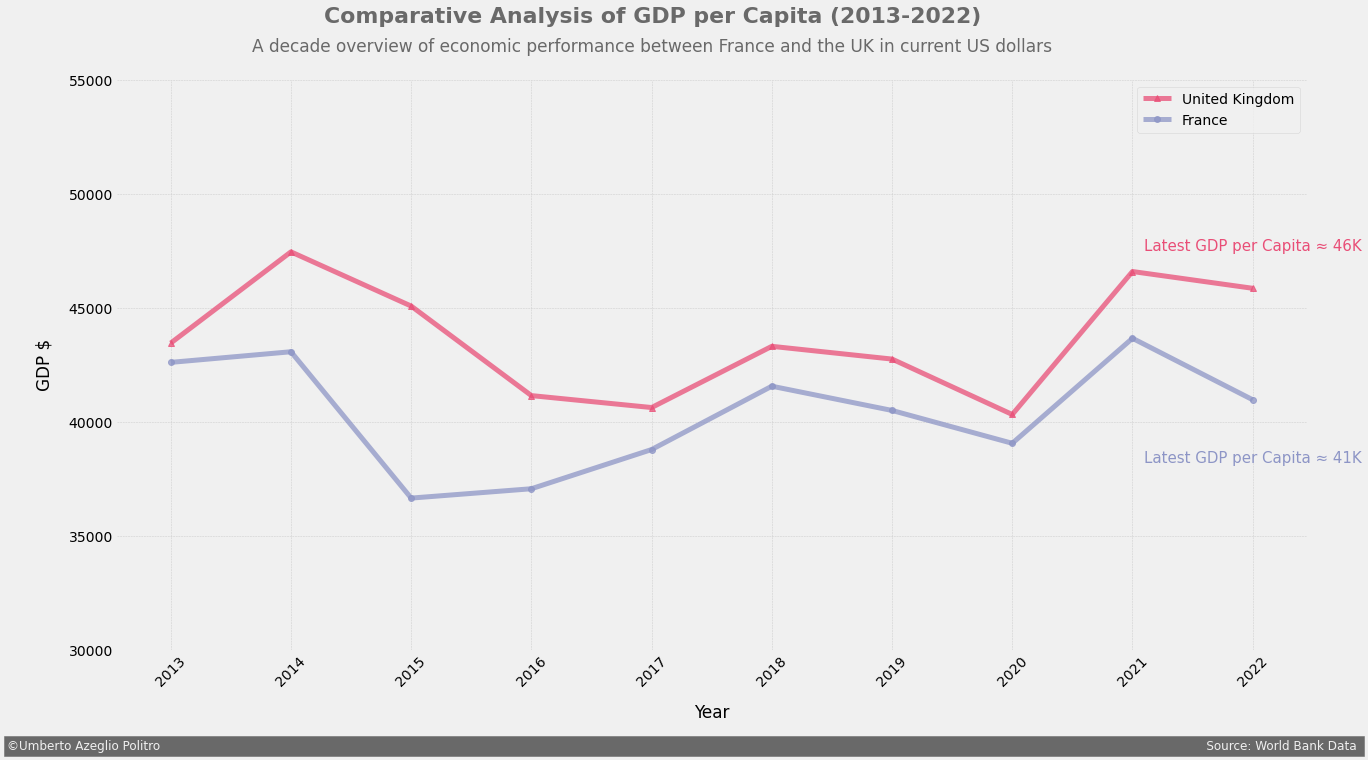

In [146]:
gdp_uk = gdp_df.loc[(gdp_df["Country Name"] == "United Kingdom") & (gdp_df["After 2012"] == 1)]
gdp_fr = gdp_df.loc[(gdp_df["Country Name"] == "France") & (gdp_df["After 2012"] == 1)]
uk_latest_year = max(gdp_uk["Year"])
uk_latest_gdp = gdp_uk.loc[gdp_uk["Year"] == uk_latest_year, "GDP $"].iloc[0]
fr_latest_year = max(gdp_fr["Year"])
fr_latest_gdp = gdp_fr.loc[gdp_fr["Year"] == fr_latest_year, "GDP $"].iloc[0]
print(gdp_uk)
fig, ax = plt.subplots(figsize = (19, 11))
spines = ["top", "left", "bottom", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)
plt.plot(gdp_uk["Year"], gdp_uk["GDP $"], label = "United Kingdom", marker='^',color = "#E94E77",alpha = 0.75,  linewidth=5)
plt.plot(gdp_fr["Year"], gdp_fr["GDP $"], label = "France", marker='o',color = "#8D95C6", alpha = 0.75, linewidth=5)



plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.xticks(rotation=45)
ax.set_xlabel("Year", labelpad=15)
ax.set_ylabel("GDP $", labelpad=15)
#ax.set_xticks(range(2000, 2023, 2))
ax.set_xticks(range(2013, 2023))
#years_after_2012 = gdp_uk.loc[gdp_uk["After 2012"] == 1, "Year"]
#ax.set_xticks(years_after_2012)

ax.set_ylim(30000, 55000)
plt.legend()
#fig.set_facecolor('#fafafa')
#ax.set_facecolor('#fafafa')
# Adjust the bottom margin of the figure to create space for the text
plt.subplots_adjust(bottom=0.16)

# Add the text to the bottom left of the figure
fig.text(0, 0.03, '©Umberto Azeglio Politro' + ' '*270 + 'Source: World Bank Data ',
         color='#f0f0f0', backgroundcolor="#696969",
         size=12, ha='left', va='bottom')

#ax.grid(visible = False)
ax.text(0.45, 1.10, "Comparative Analysis of GDP per Capita (2013-2022)", transform=ax.transAxes, size=22, weight='bold', ha="center", color = "#696969")
ax.text(0.45, 1.05, "A decade overview of economic performance between France and the UK in current US dollars", transform=ax.transAxes, size=17, ha="center", color ="#696969")
ax.text(uk_latest_year, uk_latest_gdp +2200,f"Latest GDP per Capita ≈ {round(uk_latest_gdp/1000)}K", ha='center', va='top', fontsize=15, color="#E94E77")
ax.text(fr_latest_year, fr_latest_gdp -2200,f"Latest GDP per Capita ≈ {round(fr_latest_gdp/1000)}K", ha='center', va='top', fontsize=15, color="#8D95C6")
#plt.title("World Happiness Index Rank (2013-2023)", size = 16, weight = "bold",pad=20, loc='center')
#ax.text(0.01, 0.05, "World Happiness Index Rank (2013-2023)", size=17, weight='bold')

plt.savefig("GDP Analysis", dpi=100, bbox_inches='tight')



In [10]:
percentage_difference_GDP = str(round(((uk_latest_gdp - fr_latest_gdp) / fr_latest_gdp) * 100)) + "%"
print(percentage_difference_GDP)

12%


0                        Fiji
2                   W. Sahara
7            Papua New Guinea
12                    Somalia
14                      Sudan
16                      Haiti
19                    Bahamas
20               Falkland Is.
22                  Greenland
23     Fr. S. Antarctic Lands
24                Timor-Leste
26                    Lesotho
39                     Belize
41                     Guyana
42                   Suriname
45                Puerto Rico
47                       Cuba
62              Guinea-Bissau
66       Central African Rep.
69                 Eq. Guinea
73                   eSwatini
74                     Angola
75                    Burundi
85                      Qatar
86                     Kuwait
88                       Oman
89                    Vanuatu
95                North Korea
100                    Bhutan
106              Turkmenistan
108                     Syria
111                   Belarus
134             New Caledonia
135       

Text(0.72, 0.2, 'Highest Happiness Score')

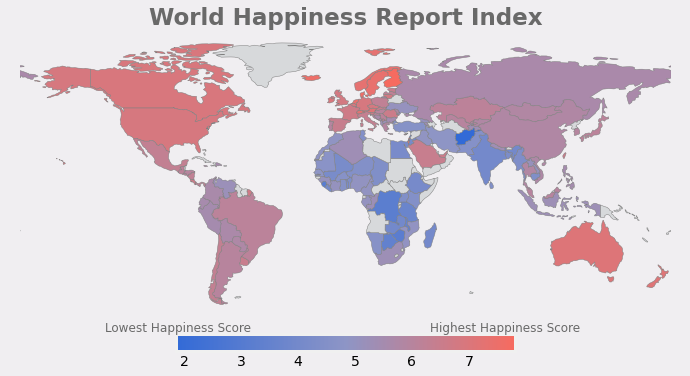

In [11]:
world_data = pd.read_excel(r"C:\Users\umber\OneDrive\Documents\GitHub\France_vs_UK\DataForFigure2.1WHR2023 (1).xls")
#I need to match the names from the world data and world

world_data_mapping = {
    'United States': 'United States of America',
    'Czechia': 'Czech Republic',
    'Dominican Republic': 'Dominican Rep.',
    'Ivory Coast': "Côte d'Ivoire",
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'Dem. Rep. Congo',
    'eSwatini': 'Swaziland',
    'North Macedonia': 'Macedonia',
    'Palestine': 'State of Palestine',
    'Taiwan Province of China': 'Taiwan',
    'Turkey': 'Turkiye',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'State of Palestine' : 'Palestine',
    "Turkiye" : "Turkey",

    "Czechia" : "Czechia"
    
}

world_data["Country name"] = world_data["Country name"].map(world_data_mapping).fillna(world_data["Country name"])


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(world_data[['Country name', 'Ladder score']], left_on='name', right_on='Country name', how='left')
world = world[world["continent"] != "Antarctica"]
world_nan = world.loc[world["Country name"].isna(), "name"]
print(world_nan)

cmap = "PuBu"
colors = ["#326AD7", "#8D95C6","#F66B60"]
cmap_custom = LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Filtering the DataFrame
fig, ax = plt.subplots(figsize=(10.8, 10.8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="0.1%", pad=-4.5)


# Set background color
ax.set_facecolor('#f0eef1')
fig.set_facecolor('#f0eef1')

# Plotting the countries with Ladder score data
#world.dropna(subset=['Ladder score']).plot(column='Ladder score', cmap=cmap, linewidth=0.5, ax=ax, edgecolor='0.5', 
                                          #legend=True, cax=cax, legend_kwds={'orientation': "horizontal"})

world[world['Ladder score'].notnull()].plot(column='Ladder score', cmap=cmap_custom, linewidth=0.5, ax=ax, edgecolor='0.5', 
                                            legend=True, legend_kwds={'orientation': "horizontal", 'shrink': 0.5})

# Plotting countries without Ladder score data in light gray
world[world['Ladder score'].isna()].plot(ax=ax, color='#d7d9db', edgecolor='0.5')

#####

# Annotating each country with their rounded ladder score
#for idx, row in world.iterrows():
   # if row['geometry'].area > 5 and not pd.isnull(row['Ladder score']):
        #ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, str(round(row['Ladder score'], 1)), 
                #fontsize=6, ha='center', va='center', color='black', fontweight='bold')

# Adjusting title and axes
ax.set_title("World Happiness Report Index", fontdict={'fontsize': '23', 'fontweight' : 'bold', "color": "#696969"})
ax.axis('off')
cax.axis('off')
ax.set_xlim([-180, 180])
ax.set_ylim([- 70, 90])
#fig.text(0.08, 0.12, '\n©Umberto Azeglio Politro' + ' '*320 + 'Source:World Happiness Index \n',
         #color='#f0f0f0', backgroundcolor='#4d4d4d',
         #size=12, ha='left', va='bottom')
fig.text(0.30, 0.20,"Lowest Happiness Score", va='center', ha='center', fontsize=12, color="#696969")
fig.text(0.72, 0.20, "Highest Happiness Score", va='center', ha='center', fontsize=12, color="#696969")

        


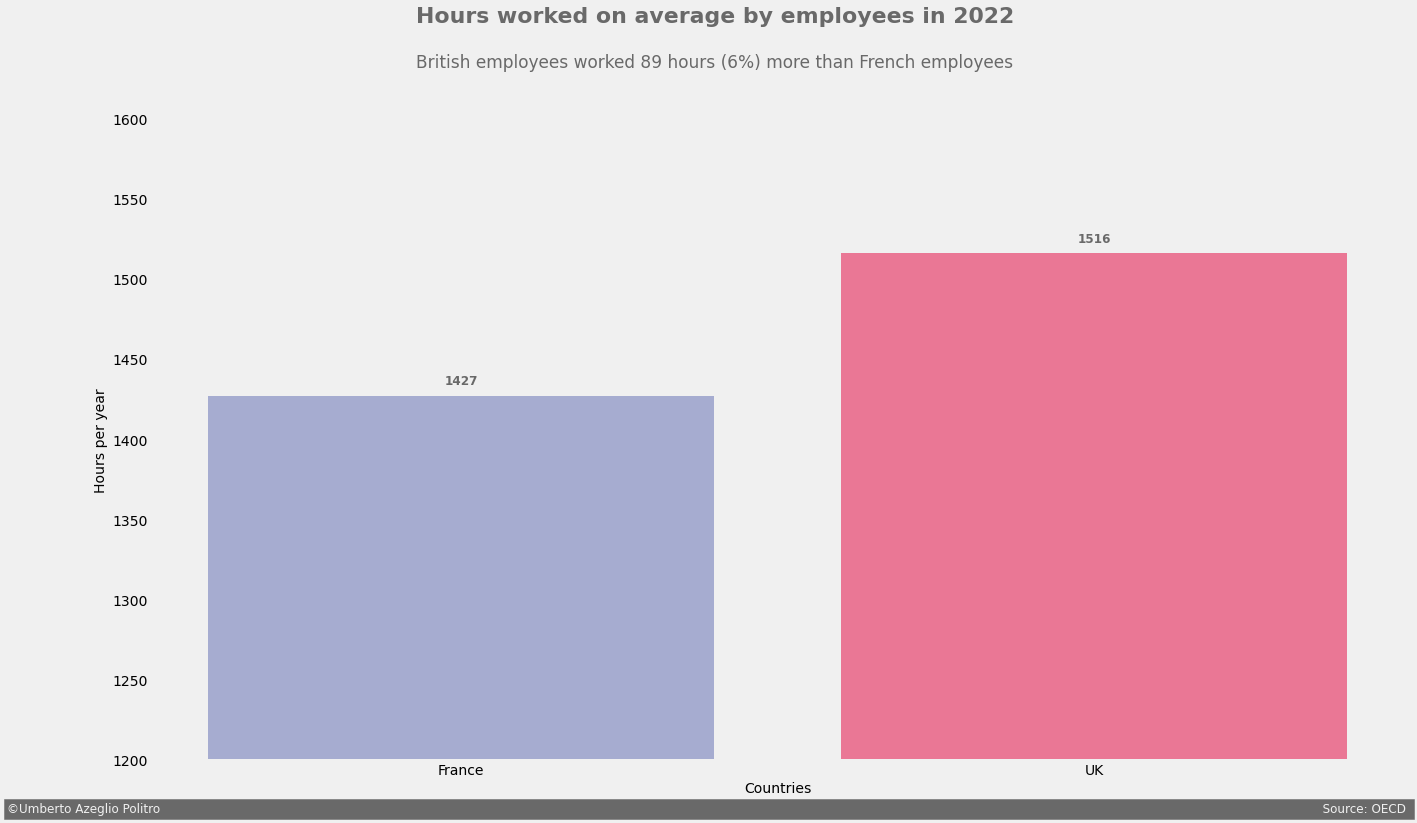

In [155]:
countries = ["France", "UK"]
colors = ['#8D95C6', '#E94E77']
values = [ average_hours_fr_2023, average_hours_uk_2023]
fig, ax = plt.subplots(figsize=(20,11))
bars = plt.bar(countries, values, color = colors, alpha = 0.75 )
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 , height + 5, int(round(height, 0)), ha='center', 
             va='bottom', color="#696969", fontsize=12, weight = "bold")
plt.ylabel('Hours per year', fontsize=14)
plt.xlabel("Countries", fontsize = 14)

ax.set_ylim(1200, 1600)
plt.grid(visible = False)
ax.text(0.45, 1.15, "Hours worked on average by employees in 2022", transform=ax.transAxes, size=22, weight='bold', ha="center", color = "#696969")
ax.text(0.45, 1.08, "British employees worked 89 hours (6%) more than French employees", transform=ax.transAxes, size=17, ha="center", color = "#696969")
# Add the text to the bottom left of the figure
fig.text(-0.02, 0.00, '©Umberto Azeglio Politro' + ' '*300 + 'Source: OECD ',
         color='#f0f0f0', backgroundcolor="#696969",
         size=12, ha='left', va='bottom')
plt.savefig("Hours Worked On Average", dpi=100, bbox_inches='tight')

[72.30005645751953, 70.30000305175781]
0.7469448282473786


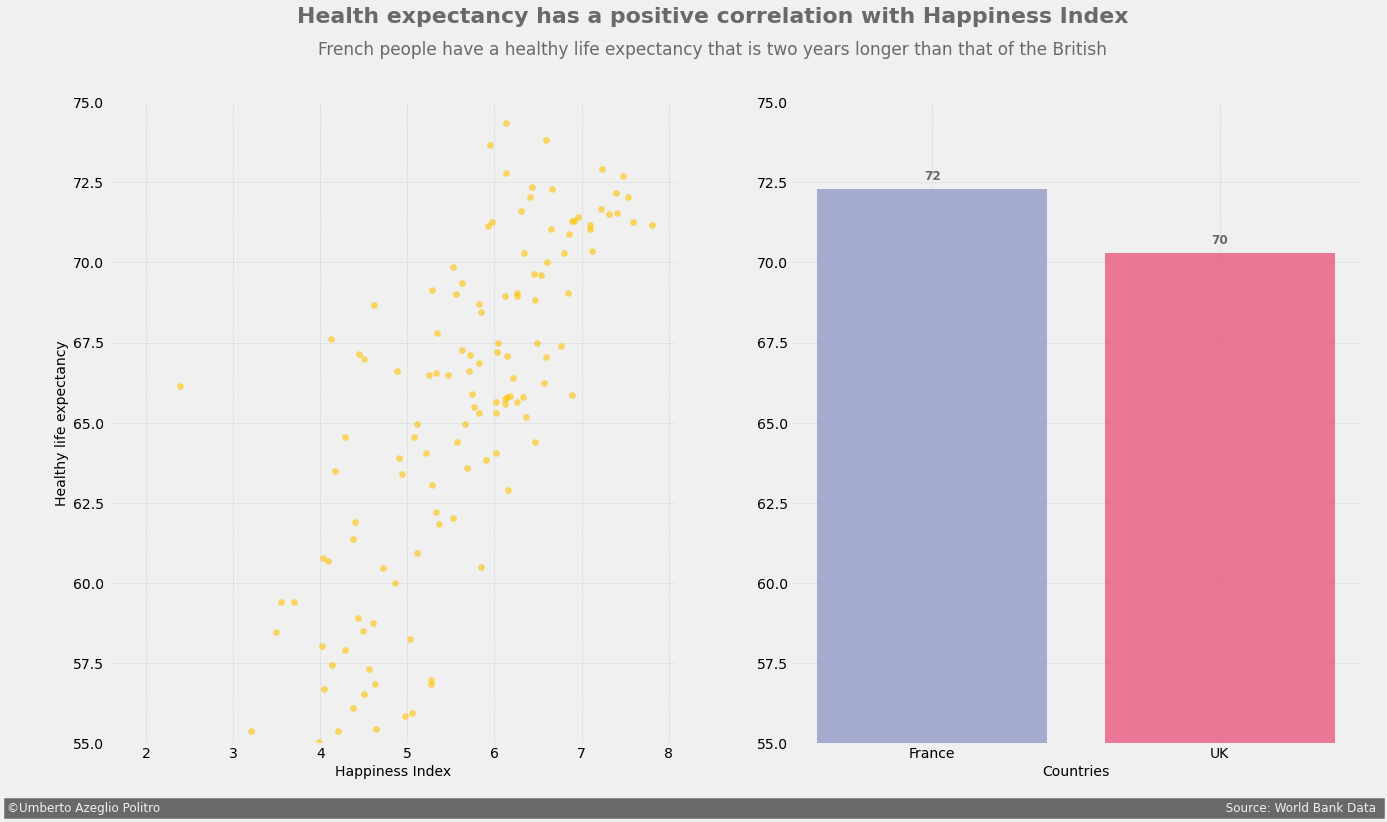

In [152]:
#Correlation
world_data = pd.read_excel(r"C:\Users\umber\OneDrive\Documents\GitHub\France_vs_UK\DataForFigure2.1WHR2023 (1).xls")

fr_uk_2023 = world_data[(world_data["Country name"] == "France") | (world_data["Country name"] == "United Kingdom")]

#for row in fr_uk:
    #life_expectancy = fr_uk[fr_uk["Healthy life expectancy"]
    #life_expectancy_fr_uk.append(life_expectancy)
life_expectancy_fr_uk = [fr_uk_2023.loc[fr_uk_2023["Country name"] == "France", "Healthy life expectancy"].iloc[0], 
                         fr_uk_2023.loc[fr_uk_2023["Country name"] == "United Kingdom", "Healthy life expectancy"].iloc[0]]    
correlation_index_health_life_expectancy = world_data["Ladder score"].corr(world_data["Healthy life expectancy"])
print(life_expectancy_fr_uk)
print(correlation_index_health_life_expectancy)
#strong correlation
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(20,11))

ax1.scatter(world_data["Ladder score"], world_data["Healthy life expectancy"], color = "#FFC400", alpha=0.6)
ax1.set_xlabel("Happiness Index", fontsize=14)
ax1.set_ylabel("Healthy life expectancy", fontsize=14)
ax1.set_ylim([55, 75])
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

bars = ax2.bar(countries, life_expectancy_fr_uk, color = colors, alpha = 0.75)
ax2.set_ylim([55, 75])
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height  + 0.2, int(round(height,2)), ha='center', 
             va='bottom', color="#696969", fontsize=12, weight = "bold")
ax2.set_xlabel("Countries", fontsize=14)
fig.text(0.50, 0.98, "Health expectancy has a positive correlation with Happiness Index", size=22, weight='bold', ha="center", color = "#696969")
fig.text(0.50, 0.94, "French people have a healthy life expectancy that is two years longer than that of the British",  size=17, ha="center", color = "#696969")
fig.text(0.01, - 0.02, '©Umberto Azeglio Politro' + ' '*275 + 'Source: World Bank Data ',
         color='#f0f0f0', backgroundcolor="#696969",
         size=12, ha='left', va='bottom')
plt.savefig("health Expectancy", dpi=100, bbox_inches='tight')

0.8346232072451136


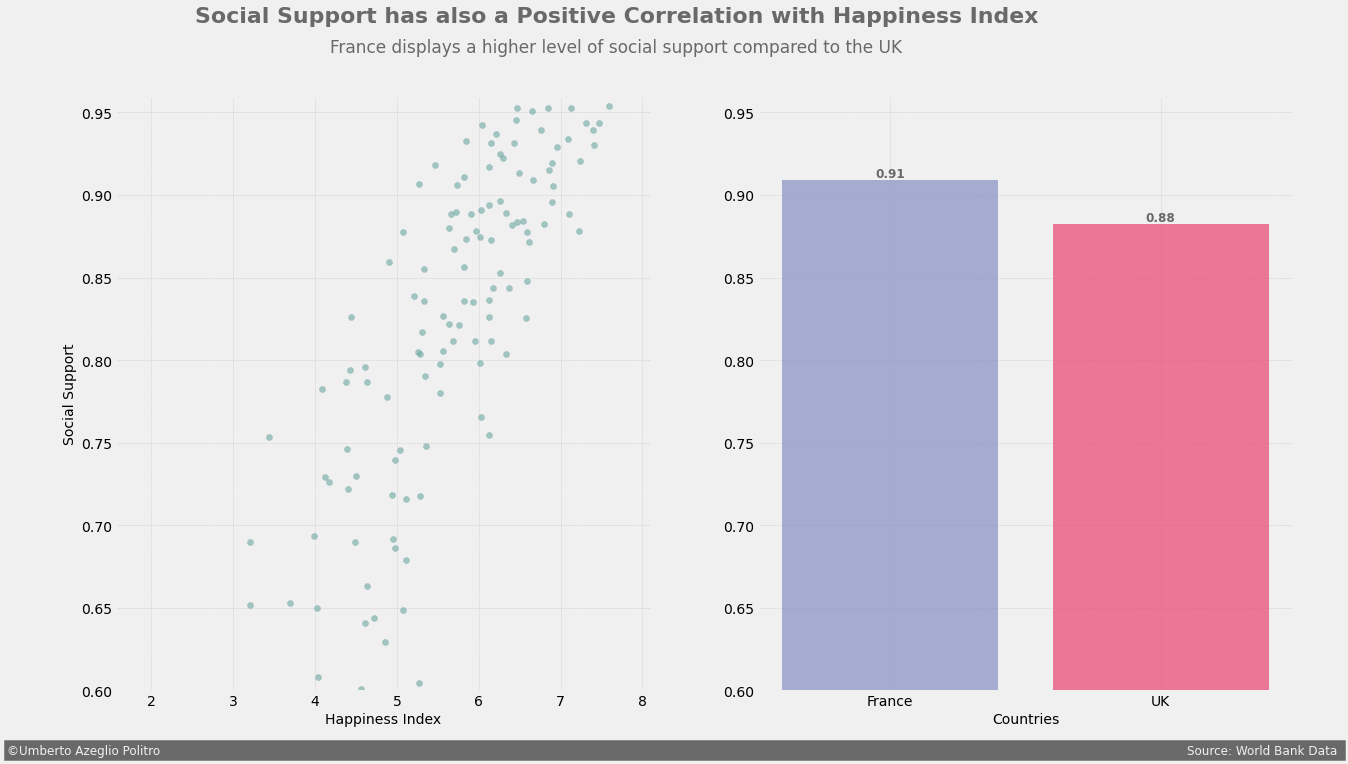

In [150]:
social_support_fr_uk = [fr_uk_2023.loc[fr_uk_2023["Country name"] == "France", "Social support"].iloc[0], 
                         fr_uk_2023.loc[fr_uk_2023["Country name"] == "United Kingdom", "Social support"].iloc[0]] 


correlation_index_Social_support = world_data["Ladder score"].corr(world_data["Social support"])

print(correlation_index_Social_support)
#strong correlation
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(18.8,10.2))

ax1.scatter(world_data["Ladder score"], world_data["Social support"], color = "#6DA8A3", alpha=0.6)
ax1.set_xlabel("Happiness Index", fontsize=14)
ax1.set_ylabel("Social Support", fontsize=14)
ax1.set_ylim([0.6, 0.96])
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

bars = ax2.bar(countries, social_support_fr_uk, color = colors, alpha = 0.75)
ax2.set_ylim([0.6, 0.96])
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, round(height,2), ha='center', 
             va='bottom', color="#696969", fontsize=12, weight = "bold")
ax2.set_xlabel("Countries", fontsize=14)
fig.text(0.45, 0.98, "Social support also has a positive Correlation with the Happiness Index", size=22, weight='bold', ha="center", color = "#696969")
fig.text(0.45, 0.94, "France displays a higher level of social support compared to the UK", size=17, ha="center", color = "#696969")
fig.text(0, - 0.02, '©Umberto Azeglio Politro' + ' '*265+ 'Source: World Bank Data ',
         color='#f0f0f0', backgroundcolor="#696969",
         size=12, ha='left', va='bottom')
plt.savefig("Social Support", dpi=100, bbox_inches='tight')



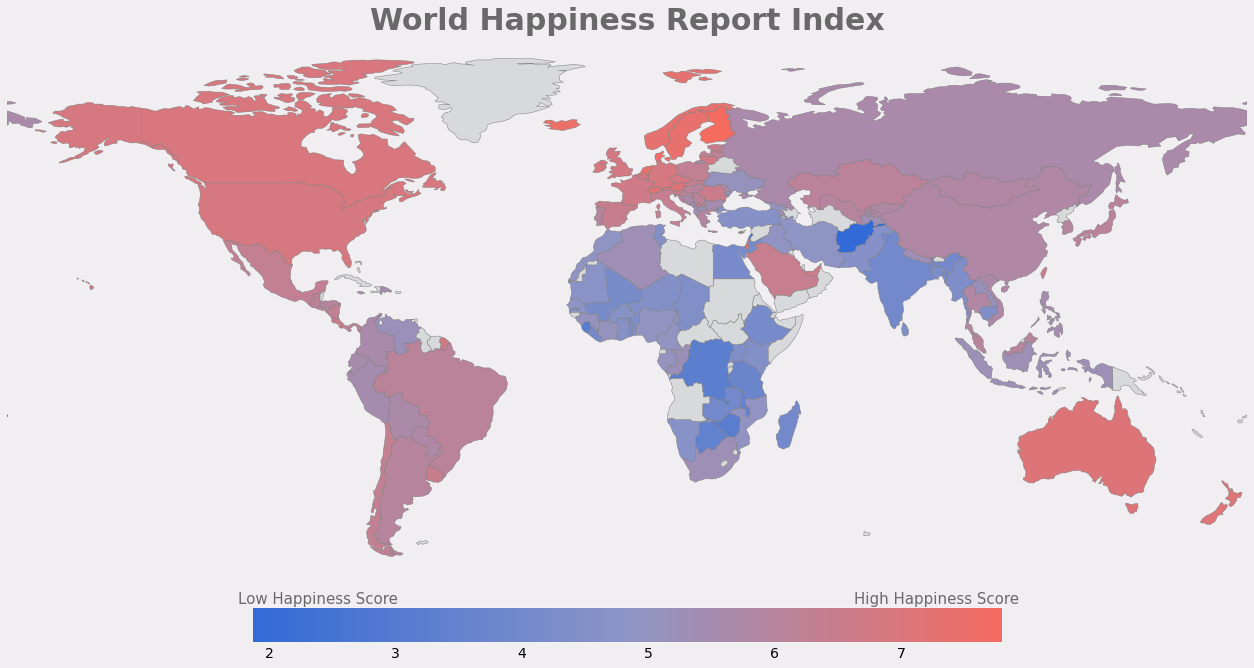

In [145]:
fig, ax = plt.subplots(figsize=(20, 11.5))

ax.set_facecolor('#f0eef1')
fig.set_facecolor('#f0eef1')

world[world['Ladder score'].notnull()].plot(column='Ladder score', cmap=cmap_custom, linewidth=0.5, ax=ax, edgecolor='0.5', 
                                            legend=True, legend_kwds={'orientation': "horizontal", 'shrink': 0.6, 'pad': 0.05})

world[world['Ladder score'].isna()].plot(ax=ax, color='#d7d9db', edgecolor='0.5')


ax.set_title("World Happiness Report Index", fontdict={'fontsize': '30', 'fontweight' : 'bold', "color": "#696969"})
ax.axis('off')
ax.set_xlim([-180, 180])
ax.set_ylim([-60, 90])
fig.text(0.30, 0.20,"Low Happiness Score", va='center', ha='center', fontsize=15, color="#696969")
fig.text(0.73, 0.20, "High Happiness Score", va='center', ha='center', fontsize=15, color="#696969")
plt.savefig("worldmap", dpi=100, bbox_inches='tight')

# Display the figure
plt.show()